### Lab 5 - NNDL

### Implementation of Convolution Neural Network

#### Name: Jerin Mathew

#### Roll No: 2139455

Q1)
Implement the given tasks in sequence
Take an input matrix with size 5x5 and a kernel with size 3x3, perform convolution with stride being 1 and 2.


In [1]:
import numpy as np

# Input matrix
input_matrix = np.array([[1, 2, 3, 4, 5],
                        [6, 7, 8, 9, 10],
                        [11, 12, 13, 14, 15],
                        [16, 17, 18, 19, 20],
                        [21, 22, 23, 24, 25]])

# Kernel
kernel = np.array([[1, 0, 1],
                  [0, 1, 0],
                  [1, 0, 1]])

# Perform convolution with stride 1
output_matrix_stride_1 = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        output_matrix_stride_1[i, j] = (input_matrix[i:i+3, j:j+3] * kernel).sum()

print("Output matrix (stride 1): \n",output_matrix_stride_1)

# Perform convolution with stride 2
output_matrix_stride_2 = np.zeros((2, 2))
for i in range(2):
    for j in range(2):
        output_matrix_stride_2[i, j] = (input_matrix[i*2:i*2+3, j*2:j*2+3] * kernel).sum()

print("Output matrix (stride 2): \n",output_matrix_stride_2)


Output matrix (stride 1): 
 [[35. 40. 45.]
 [60. 65. 70.]
 [85. 90. 95.]]
Output matrix (stride 2): 
 [[35. 45.]
 [85. 95.]]


b)Apply max-pooling, average-pooling and sum-pooling to the results from above convolutions [Q1a].


In [2]:
# Max-pooling
output_matrix_stride_1_maxpool = np.zeros((2, 2))
for i in range(2):
    for j in range(2):
        output_matrix_stride_1_maxpool[i, j] = np.max(output_matrix_stride_1[i*2:i*2+2, j*2:j*2+2])
print("Max-pooling (stride 1): \n",output_matrix_stride_1_maxpool)

output_matrix_stride_2_maxpool = np.zeros((1, 1))
output_matrix_stride_2_maxpool[0, 0] = np.max(output_matrix_stride_2)
print("Max-pooling (stride 2): \n",output_matrix_stride_2_maxpool)

# Average-pooling
output_matrix_stride_1_avgpool = np.zeros((2, 2))
for i in range(2):
    for j in range(2):
        output_matrix_stride_1_avgpool[i, j] = np.mean(output_matrix_stride_1[i*2:i*2+2, j*2:j*2+2])
print("Average-pooling (stride 1): \n",output_matrix_stride_1_avgpool)

output_matrix_stride_2_avgpool = np.zeros((1, 1))
output_matrix_stride_2_avgpool[0, 0] = np.mean(output_matrix_stride_2)
print("Average-pooling (stride 2): \n",output_matrix_stride_2_avgpool)

# Sum-pooling
output_matrix_stride_1_sumpool = np.zeros((2, 2))
for i in range(2):
    for j in range(2):
        output_matrix_stride_1_sumpool[i, j] = np.sum(output_matrix_stride_1[i*2:i*2+2, j*2:j*2+2])
print("Sum-pooling (stride 1): \n",output_matrix_stride_1_sumpool)

output_matrix_stride_2_sumpool = np.zeros((1, 1))
output_matrix_stride_2_sumpool[0, 0] = np.sum(output_matrix_stride_2)
print("Sum-pooling (stride 2): \n",output_matrix_stride_2_sumpool)


Max-pooling (stride 1): 
 [[65. 70.]
 [90. 95.]]
Max-pooling (stride 2): 
 [[95.]]
Average-pooling (stride 1): 
 [[50.  57.5]
 [87.5 95. ]]
Average-pooling (stride 2): 
 [[65.]]
Sum-pooling (stride 1): 
 [[200. 115.]
 [175.  95.]]
Sum-pooling (stride 2): 
 [[260.]]


Visualize the flattened version of the pooled feature maps from [Q1b]


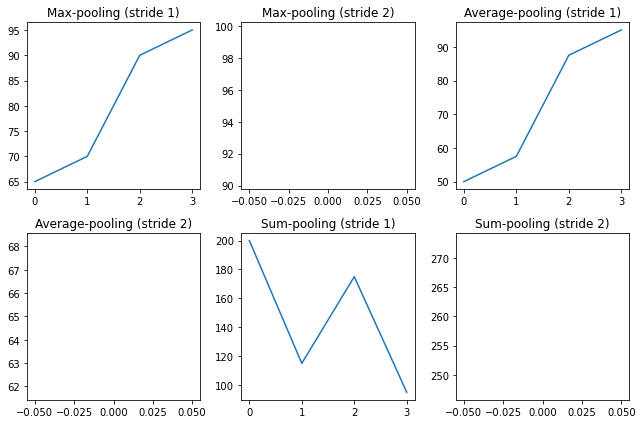

In [3]:
import matplotlib.pyplot as plt

# Flatten the pooled matrices
output_matrix_stride_1_maxpool_flat = output_matrix_stride_1_maxpool.ravel()
output_matrix_stride_2_maxpool_flat = output_matrix_stride_2_maxpool.ravel()
output_matrix_stride_1_avgpool_flat = output_matrix_stride_1_avgpool.ravel()
output_matrix_stride_2_avgpool_flat = output_matrix_stride_2_avgpool.ravel()
output_matrix_stride_1_sumpool_flat = output_matrix_stride_1_sumpool.ravel()
output_matrix_stride_2_sumpool_flat = output_matrix_stride_2_sumpool.ravel()

# Plot the flattened arrays
fig, axs = plt.subplots(2, 3, figsize=(9, 6))
axs[0, 0].plot(output_matrix_stride_1_maxpool_flat)
axs[0, 0].set_title("Max-pooling (stride 1)")
axs[0, 1].plot(output_matrix_stride_2_maxpool_flat)
axs[0, 1].set_title("Max-pooling (stride 2)")
axs[0, 2].plot(output_matrix_stride_1_avgpool_flat)
axs[0, 2].set_title("Average-pooling (stride 1)")
axs[1, 0].plot(output_matrix_stride_2_avgpool_flat)
axs[1, 0].set_title("Average-pooling (stride 2)")
axs[1, 1].plot(output_matrix_stride_1_sumpool_flat)
axs[1, 1].set_title("Sum-pooling (stride 1)")
axs[1, 2].plot(output_matrix_stride_2_sumpool_flat)
axs[1, 2].set_title("Sum-pooling (stride 2)")

fig.tight_layout()
plt.show()


With weights being randomly chosen and bias being 1, learn the weights and bias over an epoch for the flattened arrays from [Q1c] (you may reuse your lab#2 or lab#3 code)

In [4]:
# Assume the flattened arrays are the input features and target is a scalar
features = output_matrix_stride_1_maxpool_flat
target = 2

# Initialize the weights and bias with random values
weights = np.random.rand(output_matrix_stride_1_maxpool_flat.shape[0])
bias = 1

# Set the learning rate
learning_rate = 0.1

# Number of iterations
epochs = 1000

# Perform gradient descent
for _ in range(epochs):
    # Make a prediction
    prediction = np.dot(features, weights) + bias
    
    # Calculate the error
    error = prediction - target
    
    # Update the weights
    weights -= learning_rate * np.dot(error, features)
    
    # Update the bias
    bias -= learning_rate * error

print("Weights: ",weights)
print("Bias: ",bias)


Weights:  [nan nan nan nan]
Bias:  nan


C:\Users\JERIN\AppData\Local\Temp\ipykernel_16372\2142603997.py:24: RuntimeWarning: invalid value encountered in subtract
  weights -= learning_rate * np.dot(error, features)


2) Rebuild any CNN architecture of your choice from a textbook or online sources for image classification/handwritten digit recognition. Interpret your observations with necessary metrics.

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.Sequential()

# First set of convolutional and max pooling layers
model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.AveragePooling2D())

# Second set of convolutional and max pooling layers
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

# Flattening layer
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))

# Output layer
model.add(layers.Dense(units=10, activation='softmax'))


